# Predicting The Costs Of Used Cars - Hackathon By Imarticus Learning

<p>Driverless cars are getting closer to reality and at a faster pace than ever. But it is still a bit far fetched dream to have one in your garage. For the time being, there are still a lot of combustion and hybrid cars that roar around the road, for some it chills. Though the overall data on sales of automobiles shows a huge drop in sales in the last couple of years, cars are still a big attraction for many. Cars are more than just a utility for many. They are often the pride and status of the family. We all have different tastes when it comes to owning a car or at least when thinking of owning one.</p>
<br>
<p>Well here of course as the name suggests we are not concentrating on a new car, rather our interest is in knowing the prices of used cars across the country whether it is a royal l luxury sedan or a cheap budget utility vehicle. In this hackathon, you will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.</p>
<br>

Size of <b>training</b> set: <b>6,019</b> records
<br>
Size of <b>test</b> set: <b>1,234</b> records

## Contents 
<ol type='1'>
    <li>Exploratory Data Analysis</li>
    <li>Feature Extraction & Transformation</li>
    <li>Model Building</li>
    <li>Hyper-Parameter Tuning</li>
    <li>Metrics</li>
</ol>    

## 1. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_excel('D:/Data Science/Data/Competition/AnalyticsINdiaMag/Used Car/Participants_Data_Used_Cars/Participants_Data_Used_Cars/Data_Train.xlsx')
test = pd.read_excel('D:/Data Science/Data/Competition/AnalyticsINdiaMag/Used Car/Participants_Data_Used_Cars/Participants_Data_Used_Cars/Data_Test.xlsx')

In [3]:
df = pd.concat([train,test],axis=0,ignore_index=True)

<p>Since, the volume of the train is very less, I found it justified to add the test data also to check out the patterns, trends & relations in the data.</p>

Let's check out the columns & data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
Engine               7207 non-null object
Fuel_Type            7253 non-null object
Kilometers_Driven    7253 non-null int64
Location             7253 non-null object
Mileage              7251 non-null object
Name                 7253 non-null object
New_Price            1006 non-null object
Owner_Type           7253 non-null object
Power                7207 non-null object
Price                6019 non-null float64
Seats                7200 non-null float64
Transmission         7253 non-null object
Year                 7253 non-null int64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.7+ KB


In [5]:
cont_cols = ['Engine', 'Mileage', 'Power', 'Kilometers_Driven']
cat_cols = ['Fuel_Type', 'Owner_Type', 'Location', 'Transmission']
dsct_cols = ['Year','Seats']

In [6]:
df.head()

,Engine,Fuel_Type,Kilometers_Driven,Location,Mileage,Name,New_Price,Owner_Type,Power,Price,Seats,Transmission,Year
0,998 CC,CNG,72000,Mumbai,26.6 km/kg,Maruti Wagon R LXI CNG,NaN,First,58.16 bhp,1.75,5.0,Manual,2010
1,1582 CC,Diesel,41000,Pune,19.67 kmpl,Hyundai Creta 1.6 CRDi SX Option,NaN,First,126.2 bhp,12.50,5.0,Manual,2015
2,1199 CC,Petrol,46000,Chennai,18.2 kmpl,Honda Jazz V,8.61 Lakh,First,88.7 bhp,4.50,5.0,Manual,2011
3,1248 CC,Diesel,87000,Chennai,20.77 kmpl,Maruti Ertiga VDI,NaN,First,88.76 bhp,6.00,7.0,Manual,2012
4,1968 CC,Diesel,40670,Coimbatore,15.2 kmpl,Audi A4 New 2.0 TDI Multitronic,NaN,Second,140.8 bhp,17.74,5.0,Automatic,2013


<B> Observation: </B><br>
From df.info() it was an interesting find that columns like Power, Mileage & Engine were categorical variables as we generally expect them to be continuous. Upon taking a closer look it's apparent that the trailing strings cause that.

In [7]:
df.isnull().sum()

Engine                 46
Fuel_Type               0
Kilometers_Driven       0
Location                0
Mileage                 2
Name                    0
New_Price            6247
Owner_Type              0
Power                  46
Price                1234
Seats                  53
Transmission            0
Year                    0
dtype: int64

In [8]:
df.drop(columns=['New_Price'],inplace=True)

<b> Hypothesis: </b><br>
1. With Larger Engine, Selling Price goes-up. Also, the power delivered have a positive relation with engine.
2. Need to check what kind of relation exists between Fuel_Type and Price, Location and Price
3. A less driven car is more likely to fetch higher selling price.
4. Higher the mileage higher the selling price.
5. Owner type will also be significant considering whether: first, second or third.



### Continuous Variables

Before we can proceed with the EDA we have to strip strings from values that are supposed to be numbers only.

In [9]:
df['Engine']=df['Engine'].str.strip(' CC').astype(float)

In [10]:
df['Mileage'] = df['Mileage'].str.strip('km/kg')
df['Mileage'] = df['Mileage'].str.strip('kmpl').astype(float)

In [11]:
df['Power'] = np.where(df['Power']=='null bhp',np.NaN,df['Power'])
df['Power']=df['Power'].str.strip(' bhp').astype(float)

<B> Engine vs Price</B>

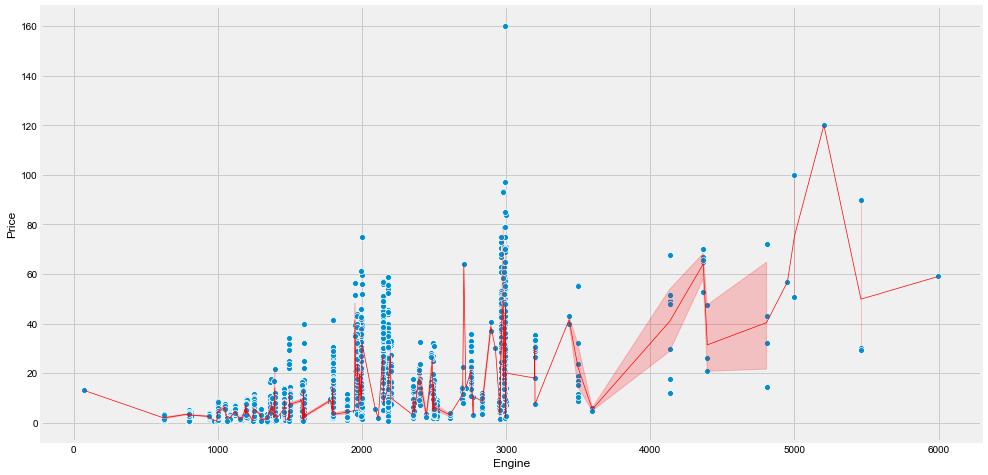

In [12]:
f,ax=plt.subplots(1,1,figsize=(15,8))
sns.set(style="ticks", rc={"lines.linewidth": 0.7})
sns.scatterplot('Engine','Price',data=df,ax=ax)
sns.lineplot('Engine','Price',data=df,ax=ax,color='red')
plt.show()

<B> Power vs Price 

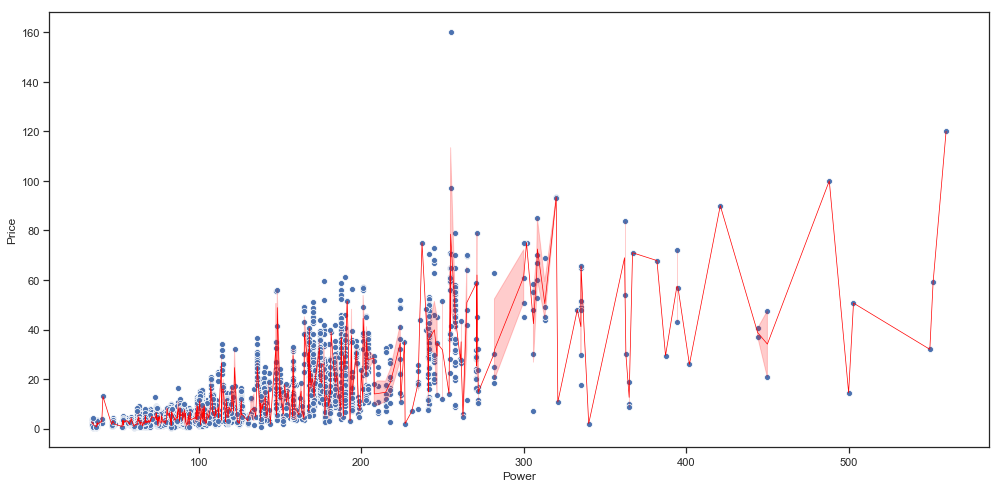

In [13]:
f,ax=plt.subplots(1,1,figsize=(15,8))
sns.set(style="ticks", rc={"lines.linewidth": 0.7})
sns.scatterplot('Power','Price',data=df,ax=ax)
sns.lineplot('Power','Price',data=df,ax=ax,color='red',dashes='--')
plt.show()

<b>Engine vs Power </b>

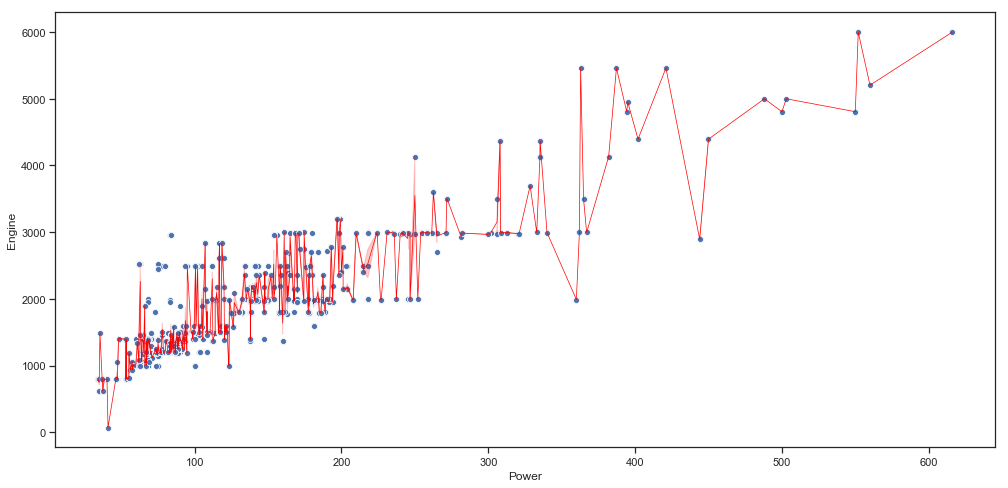

In [14]:
f,ax=plt.subplots(1,1,figsize=(15,8))
sns.set(style="ticks", rc={"lines.linewidth": 0.7})
sns.scatterplot('Power','Engine',data=df,ax=ax)
sns.lineplot('Power','Engine',data=df,ax=ax,color='red',dashes='--')
plt.show()

<B> Observation: </B><BR>
    1. There exists a positive relationship between Engine, Power & Price
    2. But the data points for prices are highly skewed and requires certain transformation.

<B> Mileage vs Price </B>

[]

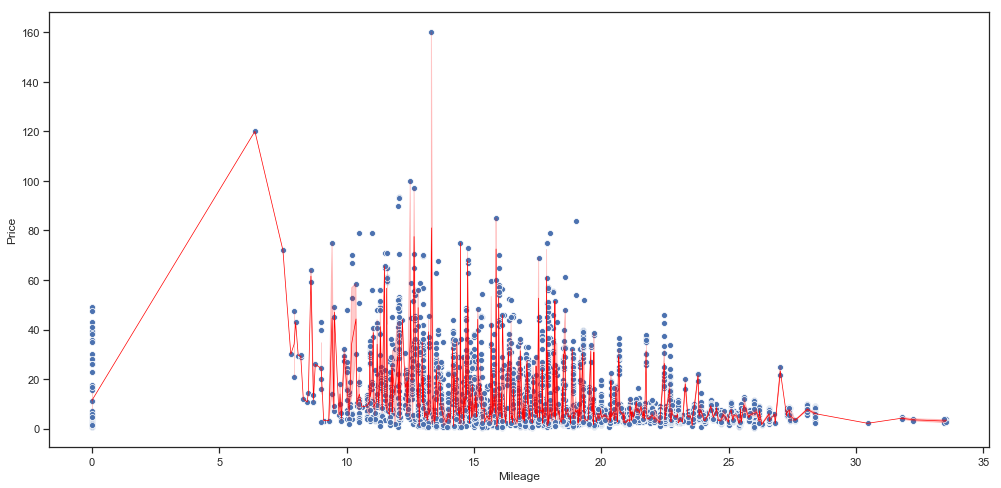

In [15]:
f,ax=plt.subplots(1,1,figsize=(15,8))
sns.scatterplot('Mileage','Price',data=df,ax=ax)
sns.lineplot('Mileage','Price',data=df,ax=ax,color='red',dashes='--')
plt.plot()

[]

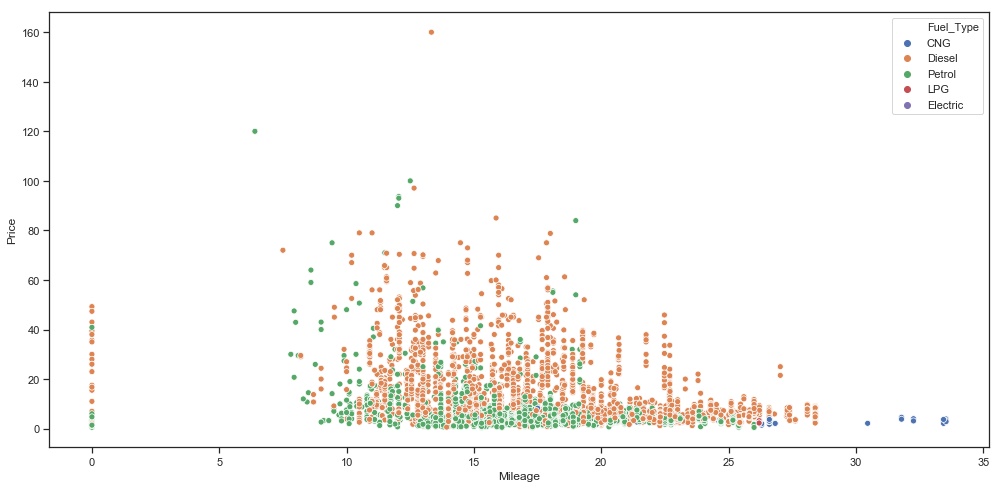

In [16]:
f,ax=plt.subplots(1,1,figsize=(15,8))
sns.scatterplot('Mileage','Price',data=df,ax=ax,hue='Fuel_Type')
plt.plot()

<B> Observations: </B></BR>
1. Strangely enough, the price doesnot go up with increase in mileage.
2. Cars running on Diesel is more expensive than those of Petrol.

<B> Kilometers Driven vs Price </B>

In [17]:
x = df['Kilometers_Driven'][df['Kilometers_Driven']<1000000]
y = df['Price'][df['Kilometers_Driven']<1000000]

[]

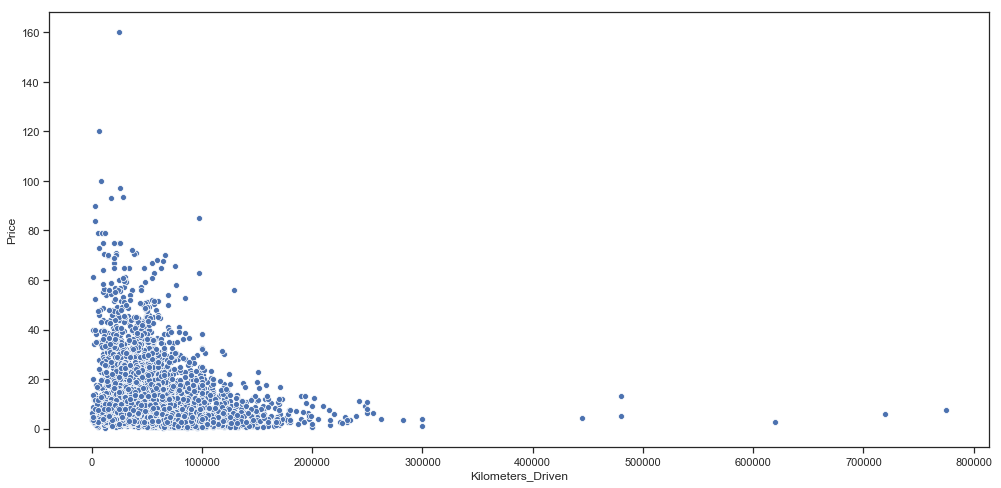

In [18]:
f,ax=plt.subplots(1,1,figsize=(15,8))
sns.scatterplot(x,y,data=df,ax=ax)
# sns.lineplot(x,y,data=df,ax=ax,color='red',dashes='--')
plt.plot()

<B> Observation: </B><BR>
    1. Very apparent and proves my hypothesis that a less driven car is more likely to fetch higher selling price.

### Overall Observations:

1. The variable price is slightly skewed and requires a log transform.
2. Positive Trend between Engine, Power & Price.
3. Negative Trend between Kilometers Driven & Price.

In [19]:
df['Price'] = np.log1p(df['Price']) #log transform on price

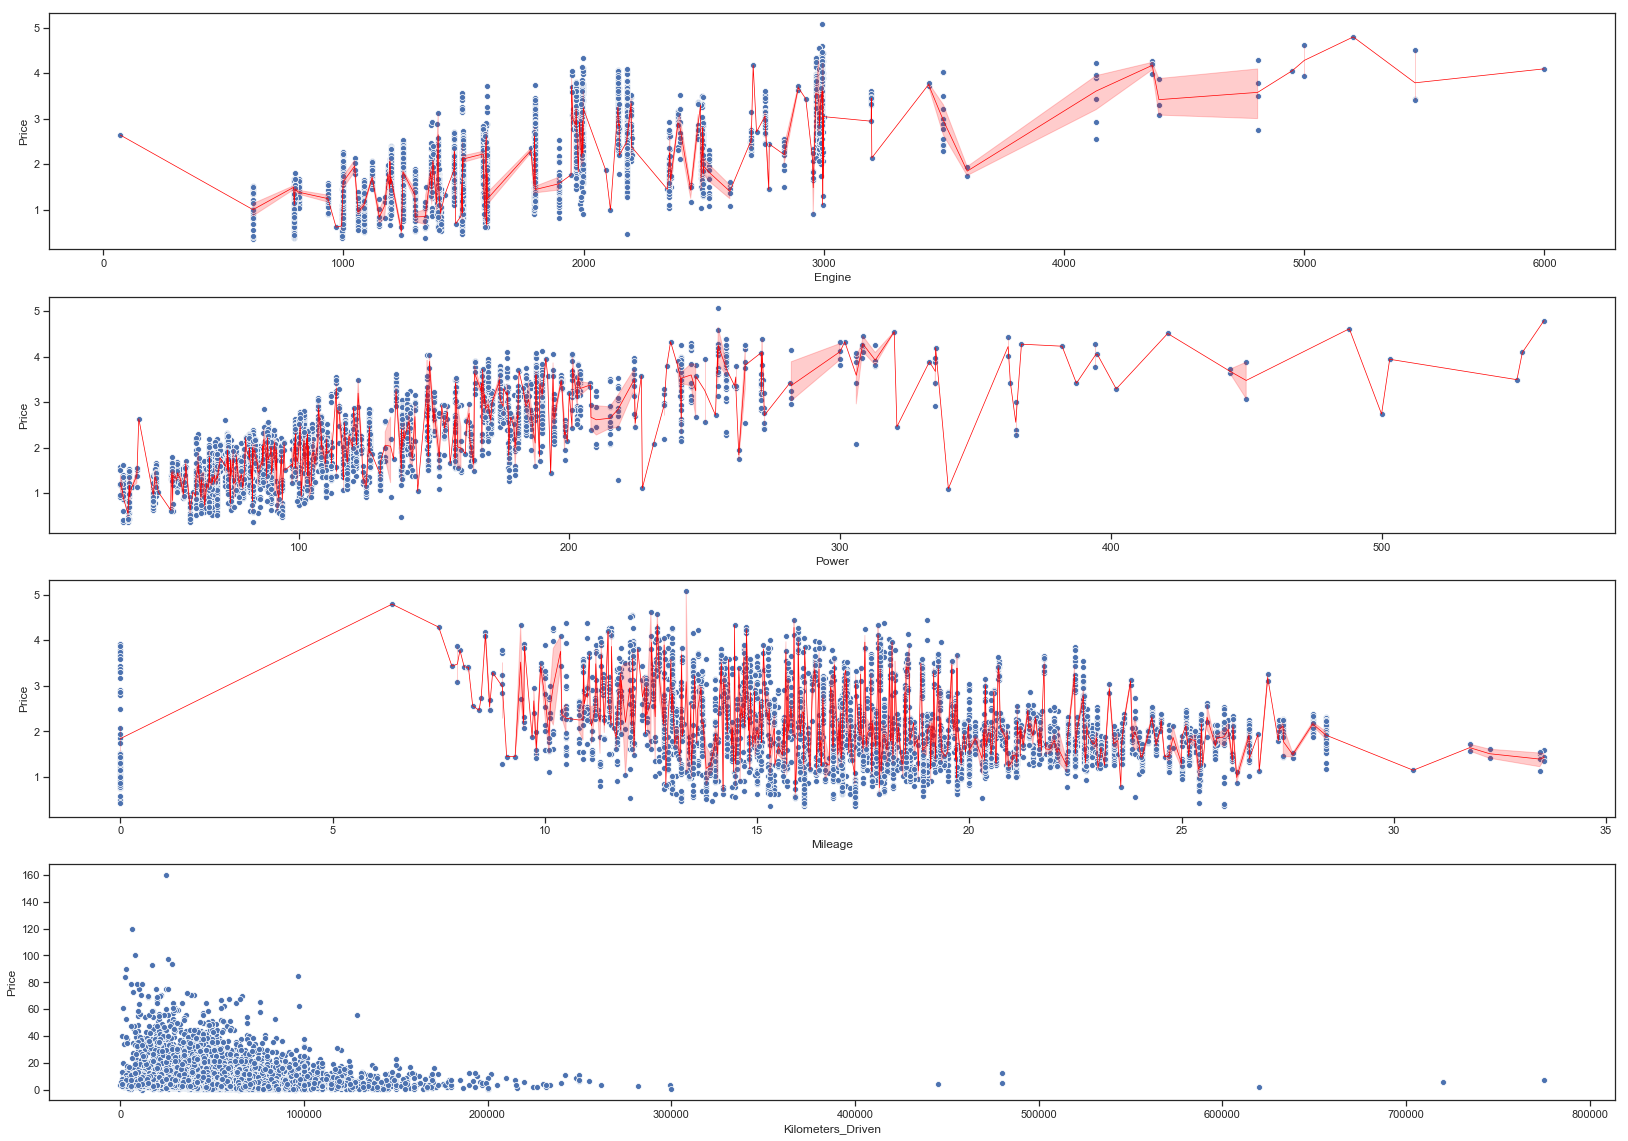

In [20]:
f,ax=plt.subplots(4,1,figsize=(25,20))
sns.set(style="ticks", rc={"lines.linewidth": 0.7})
sns.scatterplot('Engine','Price',data=df,ax=ax[0])
sns.lineplot('Engine','Price',data=df,ax=ax[0],color='red')
sns.scatterplot('Power','Price',data=df,ax=ax[1])
sns.lineplot('Power','Price',data=df,ax=ax[1],color='red')
sns.scatterplot('Mileage','Price',data=df,ax=ax[2])
sns.lineplot('Mileage','Price',data=df,ax=ax[2],color='red')
sns.scatterplot(x,y,data=df,ax=ax[3])
# sns.lineplot('Kilometers_Driven','Price',data=df,ax=ax[3],color='red')
plt.show()

After log(price) the trend in price is more clearer.

### Categorical Variables

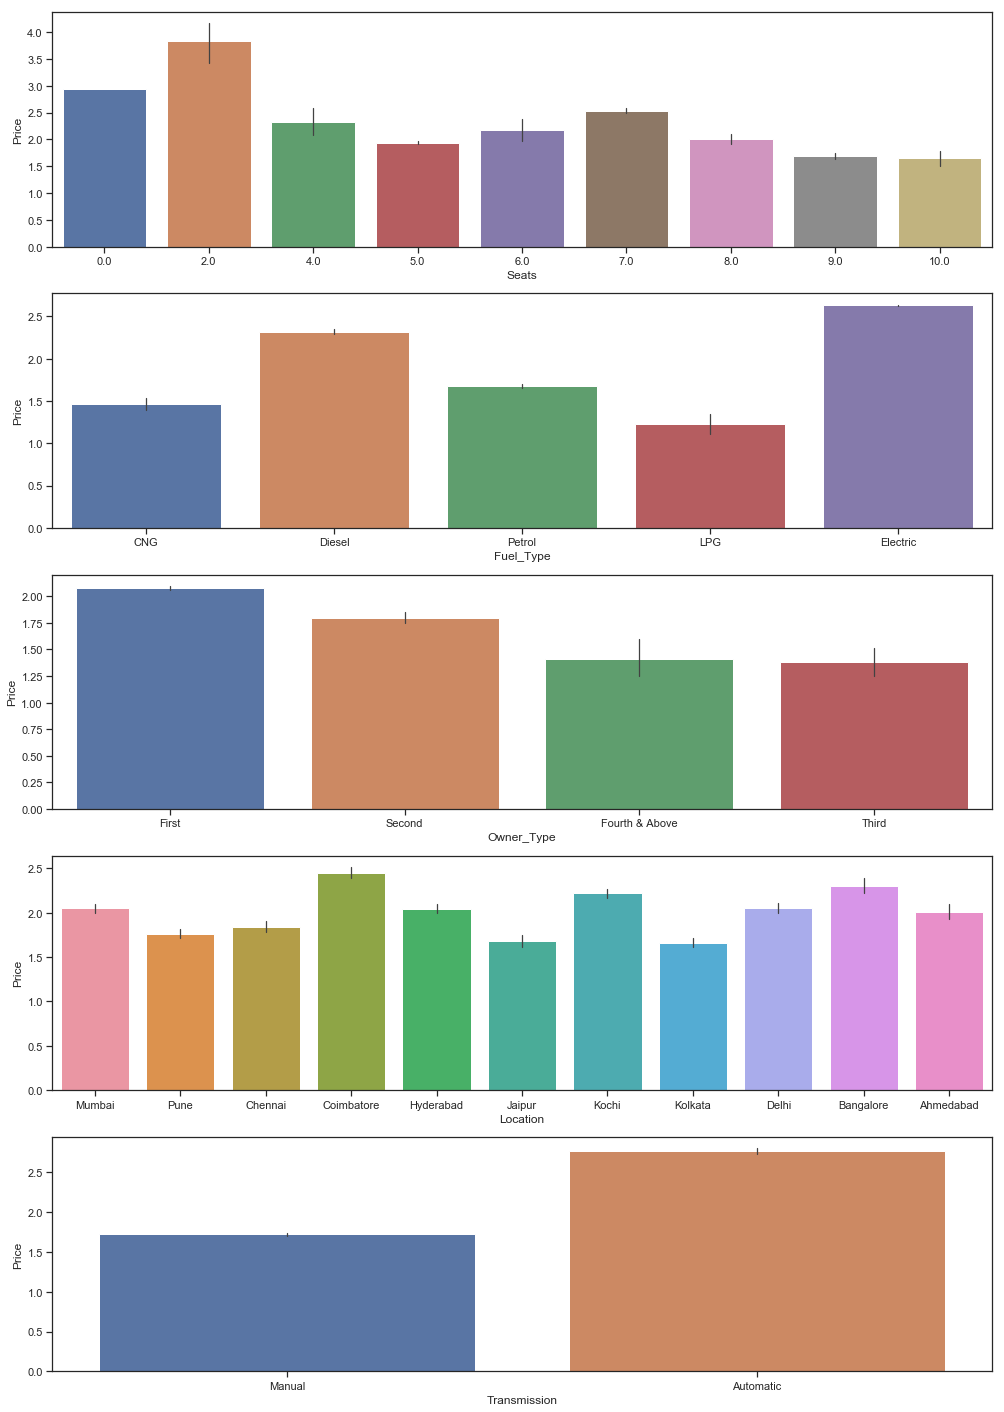

In [21]:
f,ax=plt.subplots(5,1,figsize=(15,25))
sns.barplot('Seats','Price',data=df,ax=ax[0])
sns.barplot('Fuel_Type','Price',data=df,ax=ax[1])
sns.barplot('Owner_Type','Price',data=df,ax=ax[2])
sns.barplot('Location','Price',data=df,ax=ax[3])
sns.barplot('Transmission','Price',data=df,ax=ax[4])
plt.show()

There is a myriad of combinations left to check out the relationship between multiple variables. But since our focus is to build a predictive model for the selling price we would concentrate on that.

## 2. Feature Transformation & Null Handling

1. We have already transformed Engine, Power, Mileage & KM driven to continuous variables.
2. Log transforming the variable price gave more definition to the pattern.

<B> Null Handling 

In [22]:
for col in cont_cols:
    print('No. of Nulls in {} column: {}'.format(col,df[col].isnull().sum()))

No. of Nulls in Engine column: 46
No. of Nulls in Mileage column: 2
No. of Nulls in Power column: 175
No. of Nulls in Kilometers_Driven column: 0


In [23]:
for col in cat_cols:
    print('No. of Nulls in {} column: {}'.format(col,df[col].isnull().sum()))

No. of Nulls in Fuel_Type column: 0
No. of Nulls in Owner_Type column: 0
No. of Nulls in Location column: 0
No. of Nulls in Transmission column: 0


In [24]:
for col in dsct_cols:
    print('No. of Nulls in {} column: {}'.format(col,df[col].isnull().sum()))

No. of Nulls in Year column: 0
No. of Nulls in Seats column: 53


In [25]:
summ_df = pd.DataFrame(columns=['Variables','count','mean','std','min','25%','50%','75%','max'])
for col in cont_cols:
    temp = pd.DataFrame(columns=['Variables','count','mean','std','min','25%','50%','75%','max'])
    temp = df[col].describe().to_frame().transpose()
    temp['Variables'] = col
    summ_df = pd.concat([summ_df,temp],axis=0,ignore_index=True)
    
summ_df

,25%,50%,75%,Variables,count,max,mean,min,std
0,1198.00,1493.00,1968.0,Engine,7207.0,5998.00,1616.573470,72.0,595.285137
1,15.17,18.16,21.1,Mileage,7251.0,33.54,18.141580,0.0,4.562197
2,75.00,94.00,138.1,Power,7078.0,616.00,112.765214,34.2,53.493553
3,34000.00,53416.00,73000.0,Kilometers_Driven,7253.0,6500000.00,58699.063146,171.0,84427.720583


In [26]:
summ_df = pd.DataFrame(columns=['Variables','count','mean','std','min','25%','50%','75%','max'])
for col in cat_cols:
    temp = pd.DataFrame(columns=['Variables','count','mean','std','min','25%','50%','75%','max'])
    temp = df[col].describe().to_frame().transpose()
    temp['Variables'] = col
    summ_df = pd.concat([summ_df,temp],axis=0,ignore_index=True)
    
summ_df

,25%,50%,75%,Variables,count,freq,max,mean,min,std,top,unique
0,NaN,NaN,NaN,Fuel_Type,7253,3852,NaN,NaN,NaN,NaN,Diesel,5
1,NaN,NaN,NaN,Owner_Type,7253,5952,NaN,NaN,NaN,NaN,First,4
2,NaN,NaN,NaN,Location,7253,949,NaN,NaN,NaN,NaN,Mumbai,11
3,NaN,NaN,NaN,Transmission,7253,5204,NaN,NaN,NaN,NaN,Manual,2


In [27]:
summ_df = pd.DataFrame(columns=['Variables','count','mean','std','min','25%','50%','75%','max'])
for col in dsct_cols:
    temp = pd.DataFrame(columns=['Variables','count','mean','std','min','25%','50%','75%','max'])
    temp = df[col].describe().to_frame().transpose()
    temp['Variables'] = col
    summ_df = pd.concat([summ_df,temp],axis=0,ignore_index=True)
    
summ_df

,25%,50%,75%,Variables,count,max,mean,min,std
0,2011.0,2014.0,2016.0,Year,7253.0,2019.0,2013.365366,1996.0,3.254421
1,5.0,5.0,5.0,Seats,7200.0,10.0,5.279722,0.0,0.811660


<b> Observations: </b> <br>
For Null treatment of Continuous & Cateorical Variables we cannot use fill by mean as the standard deviation is quite high. 

In [28]:
for col in cont_cols:
    df[col].fillna(method='bfill',inplace=True)

In [29]:
for col in dsct_cols:
    df[col].fillna(df[col].mean(),inplace=True)     

## 3. Model Building

Well! It's a personal preference for me to create an entirely fresh approach when it comes to modelling

In [30]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [31]:
class LoadData():
    def LoadTrain(self):
        train = pd.read_excel('D:/Data Science/Data/Competition/AnalyticsINdiaMag/Used Car/Participants_Data_Used_Cars/Participants_Data_Used_Cars/Data_Train.xlsx')
        return train
    
    def LoadTest(self):
        test = pd.read_excel('D:/Data Science/Data/Competition/AnalyticsINdiaMag/Used Car/Participants_Data_Used_Cars/Participants_Data_Used_Cars/Data_Test.xlsx')
        return test

In [32]:
class FeatureEngineering():
    def EngineConvert(self,df):
        df['Engine']=df['Engine'].str.strip(' CC').astype(float)
        return df
    
    def PowerConvert(self,df):
        df['Power'] = np.where(df['Power']=='null bhp',np.NaN,df['Power'])
        df['Power']=df['Power'].str.strip(' bhp').astype(float)
        return df
    
    def MileageConvert(self,df):
        df['Mileage'] = df['Mileage'].str.strip('km/kg')
        df['Mileage'] = df['Mileage'].str.strip('kmpl').astype(float)
        return df
    
    def ContNull(self,df,columns):
        for col in columns:
            df[col].fillna(method='bfill',inplace=True)
            
        return df
    
    def CatNull(self,df,columns):
        for col in columns:
            df[col].fillna(df[col].mode(),inplace=True)  
            
        return df
    
    def FillNull(self,df,columns):
        for col in columns:
            df[col].fillna(df[col].mean(),inplace=True)
            
        return df    

In [33]:
class Encoding():
    def EncodeCat(self,df,columns):
        encoded_cat = pd.get_dummies(df[columns])
        return encoded_cat
    
    def JoinDF(self,x,y):
        df = pd.concat([x,y],axis=1)
        return df

In [34]:
class Models():
    def RFregressor(self,X,y):
        rf_model = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
        rf_model.fit(X, y)
        
        return rf_model
    
    
    def GBregressor(self,X,y):
        gb_model = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, tol=0.0001)
        gb_model.fit(X,y)
        
        return gb_model
    

In [35]:
LD = LoadData()
train = LD.LoadTrain()

FE =FeatureEngineering()
train = FE.EngineConvert(train)
train = FE.PowerConvert(train)
train = FE.MileageConvert(train)

cont_cols = ['Engine', 'Mileage', 'Power', 'Kilometers_Driven']
cat_cols = ['Fuel_Type', 'Owner_Type', 'Location', 'Transmission']
dsct_cols = ['Year','Seats']

train = FE.ContNull(train,cont_cols)
train = FE.CatNull(train,cat_cols)
train = FE.FillNull(train,dsct_cols)

train['Price'] = np.log1p(train['Price'])

Encode = Encoding()
cat_encoded = Encode.EncodeCat(train,cat_cols)
train_encoded = Encode.JoinDF(cat_encoded,train[cont_cols])

X_train, X_valid, y_train, y_valid = train_test_split(train_encoded,train.Price ,train_size=0.82,test_size=0.18,random_state=0)

M = Models()
rf = M.RFregressor(X_train,y_train)
gb = M.GBregressor(X_train,y_train)

In [36]:
predictions = rf.predict(X_valid)
print("*** RF Regressor ***")
print("MAE: " + str(mean_absolute_error(predictions, y_valid)))
print("MSE: " + str(mean_squared_error(predictions, y_valid)))
print("MSLE: " + str(mean_squared_log_error(predictions, y_valid)))

*** RF Regressor ***
MAE: 0.3298473391818262
MSE: 0.19391328977912287
MSLE: 0.023253753871132998


In [37]:
predictions = gb.predict(X_valid)
print("*** GB Regressor ***")
print("MAE: " + str(mean_absolute_error(predictions, y_valid)))
print("MSE: " + str(mean_squared_error(predictions, y_valid)))
print("MSLE: " + str(mean_squared_log_error(predictions, y_valid)))


*** GB Regressor ***
MAE: 0.2158614933678736
MSE: 0.08347439806364389
MSLE: 0.009552134517947591


In [39]:
print('Accuracy Score for GB: {}'.format(gb.score(X_train,y_train)*100))
print('Accuracy Score for RF: {}'.format(rf.score(X_train,y_train)*100))

Accuracy Score for GB: 87.77814060575939
Accuracy Score for RF: 63.22751423907518
Accuracy Score for SVR: 90.45080597188533


## 4. Hyper-Parameter Tuning

<B> RF Regressor </B>

In [40]:
rfr_params = {'n_estimators':[10,50,100,150,200],
              'criterion':['mse','mae'],
              'max_depth':[10,50,100,150,200],
              }

In [41]:
rf_model = RandomForestRegressor()

In [42]:
regr_rf = GridSearchCV(rf_model, rfr_params, cv=5)

In [43]:
regr_rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100, 150, 200], 'criterion': ['mse', 'mae'], 'max_depth': [10, 50, 100, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

<B> GB Regressor </B>

In [44]:
gb_params = {'loss':['ls','lad'],
             'n_estimators':[10,50,100,150,200],
             'criterion': ['mse','mae']}

In [45]:
gb_model = GradientBoostingRegressor()

In [46]:
regr_gb = GridSearchCV(gb_model, gb_params, cv=5)

In [47]:
regr_gb.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'loss': ['ls', 'lad'], 'n_estimators': [10, 50, 100, 150, 200], 'criterion': ['mse', 'mae']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

## 5. Metrics

In [57]:
predictions = regr_rf.predict(X_valid)
print("*** RF Regressor ***")
print("MAE: " + str(mean_absolute_error(predictions, y_valid)))
print("MSE: " + str(mean_squared_error(predictions, y_valid)))
print("MSLE: " + str(mean_squared_log_error(predictions, y_valid)))
print("Accuracy Score: {} %".format(regr_rf.score(X_train,y_train)*100))

*** RF Regressor ***
MAE: 0.17932339688013718
MSE: 0.06814602230136597
MSLE: 0.0076551800274294425
Accuracy Score: 98.3500370236168 %


In [56]:
predictions = regr_gb.predict(X_valid)
print("*** GB Regressor ***")
print("MAE: " + str(mean_absolute_error(predictions, y_valid)))
print("MSE: " + str(mean_squared_error(predictions, y_valid)))
print("MSLE: " + str(mean_squared_log_error(predictions, y_valid)))
print("Accuracy Score: {} %".format(regr_gb.score(X_train,y_train)*100))

*** GB Regressor ***
MAE: 0.20074944359098862
MSE: 0.07388768785859486
MSLE: 0.008461488637110643
Accuracy Score: 90.14131996637627 %


## 6. Predictions on Test Data

In [62]:
test = LD.LoadTest()

test = FE.EngineConvert(test)
test = FE.PowerConvert(test)
test = FE.MileageConvert(test)

test = FE.ContNull(test,cont_cols)
test = FE.CatNull(test,cat_cols)
test = FE.FillNull(test,dsct_cols)

cat_encoded = Encode.EncodeCat(test,cat_cols)
test_encoded = Encode.JoinDF(cat_encoded,test[cont_cols])
test_encoded['Fuel_Type_Electric'] = 0

predictions_rf = pd.DataFrame(regr_rf.predict(test_encoded))
predictions_gb = pd.DataFrame(regr_gb.predict(test_encoded))

In [64]:
predictions_rf.to_csv('./UsedCarPrice_RF.csv')
predictions_gb.to_csv('./UsedCarPrice_GB.csv')